<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/PDF_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
PATH1 = "/content/gdrive/My Drive/Fastai/Read_pdf/"

In [0]:
PATH = "/content/gdrive/My Drive/personal/"

In [0]:
!pip install fitz

     |████████████████████████████████| 3.2MB 5.3MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 430kB 40.0MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 235kB 37.9MB/s 
     |████████████████████████████████| 430kB 42.7MB/s 
     |████████████████████████████████| 5.8MB 39.9MB/s 
     |████████████████████████████████| 348kB 49.5MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
  Created wheel for pyxnat: filename=pyxnat-1.2.1.0.post3-cp36-none-any.whl size=71624 sha256=74feaa4d026fa1ed15a147df5c6417542aa38d69c1886562b221130823920b03
  Stored in directory: /root/.cache/pip/wheels/98/46/71/7096c8f1537087e7628bdcc723f6e766880f8dde2667009371
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=a61fd4b83b6a7fe4360373864ec43e5af712d54105c686a54acdfa79148fc4c3
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0

In [0]:
pip install PyMuPDF

     |████████████████████████████████| 5.3MB 3.3MB/s 


In [0]:
import fitz

In [0]:
doc = fitz.open(f"{PATH}passport.pdf")

In [0]:
for i in range(len(doc)):
    for img in doc.getPageImageList(i):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)
        if pix.n < 5:       # this is GRAY or RGB
            pix.writePNG(f"{PATH1}p%s-%s.png" % (i, xref))
        else:               # CMYK: convert to RGB first
            pix1 = fitz.Pixmap(fitz.csRGB, pix)
            pix1.writePNG(f"{PATH1}p%s-%s.png" % (i, xref))
            pix1 = None
        pix = None

In [0]:
from scipy import misc
import glob
import imageio

In [0]:
for image_path in glob.glob(f'{PATH1}*.png'):
  image = imageio.imread(image_path)
  print(image.shape)
  print(image.dtype)

(2339, 1656)
uint8


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

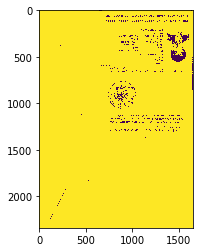

In [0]:
plt.imshow(image)

In [0]:
im = mpimg.imread(f'{PATH1}p0-4.png')

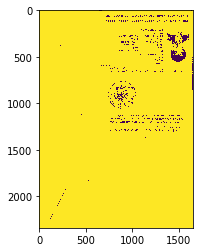

In [0]:
imgplot = plt.imshow(im)

In [0]:
from IPython.display import Image
Image(f'{PATH1}p0-4.png')

In [0]:
from PIL import Image

In [0]:
image_obj = Image.open(f'{PATH1}p0-4.png')

In [0]:
# rotate image
rotated = image_obj.rotate(180)

In [0]:
# save image
rotated.save(f'{PATH1}rotated.png')

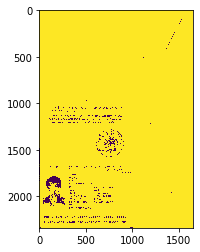

In [8]:
plt.imshow(rotated)

In [0]:
# order 
# CNN - RNN - CTC peration

In [0]:
import boto3

In [0]:
documentName = f'{PATH1}rotated.png'

In [0]:
with open(documentName, 'rb') as document:
  imageBytes = bytearray(document.read())

In [0]:
textract = boto3.client('textract', region_name='us-west-2')

In [20]:
!touch ~/.aws/config

touch: cannot touch '/root/.aws/config': No such file or directory


In [0]:
response = textract.detect_document_text(Document={'Bytes': imageBytes})
# need aws_access_key_id = XXXXXXXXXXXXXXXXXXXX 
# need aws_secret_access_key = YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY

In [9]:
!pip install pipenv

     |████████████████████████████████| 5.2MB 4.7MB/s 
     |████████████████████████████████| 3.4MB 38.0MB/s 


In [10]:
! mkdir ocr_server && cd ocr_server && pipenv install --three

Creating a virtualenv for this project…
Pipfile: /content/ocr_server/Pipfile
Using /usr/local/bin/python (3.6.9) to create virtualenv…
⠇ Creating virtual environment...Already using interpreter /usr/bin/python3
Using base prefix '/usr'
New python executable in /root/.local/share/virtualenvs/ocr_server-8AbGnQot/bin/python3
Also creating executable in /root/.local/share/virtualenvs/ocr_server-8AbGnQot/bin/python
Installing setuptools, pip, wheel...
done.
Running virtualenv with interpreter /usr/local/bin/python

✔ Successfully created virtual environment! 
Virtualenv location: /root/.local/share/virtualenvs/ocr_server-8AbGnQot
Creating a Pipfile for this project…
Pipfile.lock not found, creating…
Locking [dev-packages] dependencies…
Locking [packages] dependencies…
Updated Pipfile.lock (ca72e7)!
Installing dependencies from Pipfile.lock (ca72e7)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command ins

In [14]:
!pipenv shell

Launching subshell in virtual environment…
in/activate
(content) ]0;root@2712b60549b5: /contentroot@2712b60549b5:/content# import pytesseract
bash: import: command not found
(content) ]0;root@2712b60549b5: /contentroot@2712b60549b5:/content# exit
exit


In [12]:
!pipenv install pytesseract pillow

Installing pytesseract…
Adding pytesseract to Pipfile's [packages]…
✔ Installation Succeeded 
Installing pillow…
Adding pillow to Pipfile's [packages]…
✔ Installation Succeeded 
Pipfile.lock not found, creating…
Locking [dev-packages] dependencies…
Locking [packages] dependencies…
✔ Success! 
Updated Pipfile.lock (f0aa9c)!
Installing dependencies from Pipfile.lock (f0aa9c)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 2/2 — 00:00:01
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [15]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=b2e82387c919d6ad81db035bcfea472ddbce4e5b6ea9389e2bb4e8a2e2e5a560
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


In [0]:
import pytesseract

In [0]:
def ocr_core(filename):
  text = pytesseract.image_to_string(Image.open(filename))
  return text

In [0]:
!sudo apt update

In [0]:
!sudo apt install tesseract-ocr

In [0]:
!sudo apt install libtesseract-dev

In [24]:
print(ocr_core(f'{PATH1}rotated.png'))

BARS fo Bl Sp RRS BF AL KO AER AP AG A
85 AR AY Fir ilo EG AD

The Ministry of Foreign Affairs of the People's Republic of China
requests all civil and military authorities of foreign countries to allow the
bearer of this passport to pass freely and afford assistance in case of need.

 

OO

 

 

A FR W/ Type ARH} / Country Code aR / Passport No.

| PASSPORT : “ G1958973|
vt / Surname |
52 / au
4% / Given names . i
SRG / DONGLIARG
TEST 7 Sex PIES Adentity card No:
BM N/A
HHA: HH / Date of birth {AE AWA / Place of birth i
05 AUG 19838 1a / FUGIAN /

| SSB IM / Date of issue BOM EE / Date of expiry i

78 APR 2007 V7 APR 2017

SE RIDA / vlace of issue

Bai / AUCKLAND

 

 

POCHNWU<<DONGLIANG<<<<<< << << SKK SSK KKK
6195897311CHN880805 117041761 920NZLB<<<<<<00

Be ia a
